<a href="https://colab.research.google.com/github/datadetective8/Flipkart_Revirew_Sentiment_Analysis/blob/main/Flipkart_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Flipkart Reviews Sentiment Analysis using Python
# lets importing the necessary Python libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
print(df.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [16]:
# Lets look at the Avreage On Rating
print(df.describe())

            Rating
count  2304.000000
mean      4.259549
std       1.180017
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000


In [17]:
# Find out Is there any Missing Vlues
# The Data Base dont have any Missung Vales
print(df.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [18]:
# Now lets Start The sentiment analysis
# But Before Moving further Lets Clean the Review Coloum and preapre for Sentimet analysis

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

# Now create a fuction name call as text
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www.\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\b\w*','',text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text
df['Review'] = df["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# lets look at the Reviews given by customers at Flipkart
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

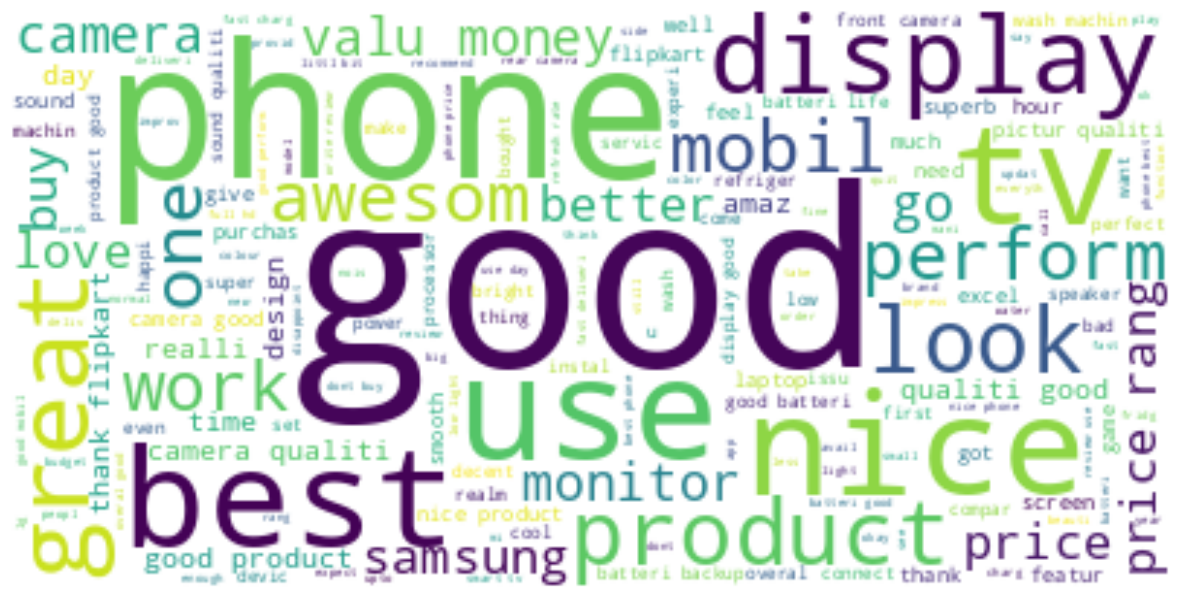

In [20]:
# lets look at the kind of the reviews that customers gave
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# Based on Sentiment analyis of Flipkart review lets Add Three columns in this dataset
# 1) Positive
# 2) Negative
# 3) Nutrual

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)['pos'] for i in df['Review']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['Review']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df ['Review']]
df = df[["Review","Positive","Negative","Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review  Positive  Negative  \
0  best 60k great performancei got around 58500ba...     0.379     0.097   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.524  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [22]:
# Now let’s see how most of the reviewers think about the products and services of Flipkart:

x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a,b,c):
  if (a > b) and (a > c):
    print("Positive 😊")
  elif (b > a) and (b > c):
    print("Negitive 😒")
  else:
    print("Neutral 😐")
sentiment_score(x,y,z)



Neutral 😐


In [23]:
# Now see the overall Output

print("Positive : ",x)
print("Negative :" ,y)
print("Neutral : ",z)



Positive :  907.9539999999984
Negative : 95.24500000000032
Neutral :  1300.8169999999989
